<a href="https://colab.research.google.com/github/KYOH95/Database_Studies/blob/main/Cancer_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

## 데이터 불러오기

In [13]:
# from google.colab import files
# files.upload()

In [14]:
df = pd.read_csv('Data_for_Diagnosis_of_Prostate_Cancer.csv')
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [15]:
#데이터 사이즈 확인
df.shape

(100, 10)

In [16]:
#결측치(nan, null)값 확인
df.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [17]:
#데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [18]:
# M, B 값 확인
print("M(1):",np.sum(df['diagnosis_result']=='M'))
print("B(0):",np.sum(df['diagnosis_result']=='B'))

M(1): 62
B(0): 38


In [19]:
# M=1, B=0 으로 바꾸기 (diagnosis_result (M = malignant, B = benign))
df.diagnosis_result = df.diagnosis_result.replace('M', 1)
df.diagnosis_result = df.diagnosis_result.replace('B', 0)

In [20]:
#데이터 스케일링, 전처리
target = df['diagnosis_result'] #알고리즘 
features = df.loc[:, 'radius':'fractal_dimension']

std_df = pd.DataFrame(StandardScaler().fit_transform(features))

## Training set(80%) & Testing set(20%)

In [21]:
#Train_test_split 8:2
df_train, df_test, target_train, target_test = train_test_split(std_df, target, test_size = 0.2, random_state = 130 ) 


In [22]:
# checking
df_train.head() 
df_test.head()

,0,1,2,3,4,5,6,7
43,-0.381079,0.536102,-0.415156,-0.496309,0.087175,0.284366,0.125038,0.408133
93,-1.411022,-0.238053,-0.415156,-0.464873,-0.050109,-0.734749,-0.952312,-0.948199
41,0.442876,1.697335,-1.051898,-1.043292,1.391371,-0.077256,-0.103491,0.531435
3,-0.587068,-0.431591,-0.797201,-0.996139,-2.246650,2.585594,2.181796,3.983916
42,-1.205033,-1.399285,1.325273,1.260954,-0.805170,1.517167,1.235035,-0.208382


In [23]:
#Accuracy 구하는 함수
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum/sum_of_all_elements

## Decision Tree

In [24]:
#Decision Tree algorithm "Classifier_DT"이름으로 선언
Classifier_DT = tree.DecisionTreeClassifier()

#trainning set을 이용해서 Classifier_DT 학습시키기
Classifier_DT.fit(df_train, target_train)

#test set과 학습된 "Classifier_DT"을 이용해서 예상 결과 값 가져오기
target_predictions_DT = Classifier_DT.predict(df_test) 

In [25]:
#Confucion Matrix
CM_DT = confusion_matrix(target_predictions_DT, target_test)
print(classification_report(target_predictions_DT, target_test))

              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.64      0.75      0.69        12

    accuracy                           0.60        20
   macro avg       0.57      0.56      0.56        20
weighted avg       0.59      0.60      0.59        20



In [26]:
Accracy_DT = accuracy(CM_DT)
print(CM_DT)
print(Accracy_DT)

[[3 5]
 [3 9]]
0.6


## Support Vector Machine

In [27]:
#SVM 모델 "Classifier_SVM"이름으로 선언
Classifier_SVM = svm.SVC()

#trainning set을 이용해서 Classifier_SVM 학습시키기
Classifier_SVM.fit(df_train, target_train)

#test set과 학습된 "Classifier_SVM"을 이용해서 예상 결과 값 가져오기
target_predictions_SVM = Classifier_SVM.predict(df_test)


In [28]:
#Confucion Matrix
CM_SVM = confusion_matrix(target_predictions_SVM, target_test)
print(classification_report(target_predictions_SVM, target_test))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.71      0.83      0.77        12

    accuracy                           0.70        20
   macro avg       0.69      0.67      0.67        20
weighted avg       0.70      0.70      0.69        20



In [29]:
Accracy_SVM = accuracy(CM_SVM)
print(CM_SVM)
print(Accracy_SVM)

[[ 4  4]
 [ 2 10]]
0.7


## Random Forest

In [30]:
#random forest 모델을 "Classifier_RF"이름으로 선언
Classifier_RF = RandomForestClassifier()

#trainning set을 이용해서 Classifier_RF 학습시키기
Classifier_RF.fit(df_train, target_train)

#test set과 학습된 "Classifier_RF"을 이용해서 예상 결과 값 가져오기
target_predictions_RF = Classifier_RF.predict(df_test)


In [31]:
#Confucion Matrix
CM_RF = confusion_matrix(target_predictions_RF, target_test)
print(classification_report(target_predictions_RF, target_test))

              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.71      0.91      0.80        11

    accuracy                           0.75        20
   macro avg       0.77      0.73      0.73        20
weighted avg       0.77      0.75      0.74        20



In [32]:
Accracy_RF = accuracy(CM_RF)
print(CM_RF)
print(Accracy_RF)

[[ 5  4]
 [ 1 10]]
0.75


## Logistic Regression

In [33]:
#logistic regression 모델을 "Classifier_LR"이름으로 선언
Classifier_LR = LogisticRegression()

#trainning set을 이용해서 Classifier_LR 학습시키기
Classifier_LR.fit(df_train, target_train)

#test set과 학습된 "Classifier_LR"을 이용해서 예상 결과 값 가져오기
target_predictions_LR = Classifier_LR.predict(df_test)


In [34]:
#Confucion Matrix
CM_LR = confusion_matrix(target_predictions_LR, target_test)
print(classification_report(target_predictions_LR, target_test))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.86      0.92      0.89        13

    accuracy                           0.85        20
   macro avg       0.85      0.82      0.83        20
weighted avg       0.85      0.85      0.85        20



In [35]:
Accracy_LR = accuracy(CM_LR)
print(CM_LR)
print(Accracy_LR)

[[ 5  2]
 [ 1 12]]
0.85


## ROC curve & Accuracy 비교

In [36]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr1, tpr1, fpr2, tpr2, fpr3, tpr3, fpr4, tpr4):
    plt.plot(fpr1, tpr1, color='red', label='Decision Tree')
    plt.plot(fpr2, tpr2, color='blue', label='Support Vector Machine')
    plt.plot(fpr3, tpr3, color='purple', label='Ramdon Foreest')
    plt.plot(fpr4, tpr4, color='green', label='Logistic Regression')
    
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend()
    plt.show()

In [37]:
fpr_DT, tpr_DT, thresholds_DT = metrics.roc_curve(target_test, target_predictions_DT)
fpr_SVM, tpr_SVM, thresholds_SVM = metrics.roc_curve(target_test, target_predictions_SVM)
fpr_RF, tpr_RF, thresholds_RF = metrics.roc_curve(target_test, target_predictions_RF)
fpr_LR, tpr_LR, thresholds_LR = metrics.roc_curve(target_test, target_predictions_LR)

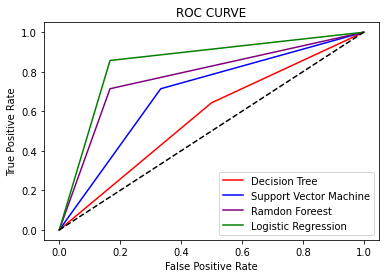

In [38]:
plot_roc_curve(fpr_DT, tpr_DT, fpr_SVM, tpr_SVM, fpr_RF, tpr_RF, fpr_LR, tpr_LR)

In [39]:
print("Decision Tree Accuracy:\t\t", Accracy_DT)
print("Support Vector Machine Accuracy:", Accracy_SVM)
print("Random Forest Accuracy:\t\t", Accracy_RF)
print("Logistic Regression Accuracy:\t", Accracy_LR)

Decision Tree Accuracy:		 0.6
Support Vector Machine Accuracy: 0.7
Random Forest Accuracy:		 0.75
Logistic Regression Accuracy:	 0.85


## 가장 높은 정확도

예) Logistic Regression 모델이 가장 높은 Accuracy를 보여준다